# Регуляризация линейной регрессии. Практическая работа

## Цель практической работы

Научиться строить модель линейной регрессии с регуляризацией на реальных данных.

## Что входит в практическую работу

1. Загрузить данные и ознакомиться с ними.
2. Изучить данные и провести анализ, сконструировать новые признаки.
3. Разделить данные на обучающую и тестовую выборки.
4. Реализовать построение модели с помощью библиотеки Scikit-learn.
5. Подобрать коэффициенты регуляризации.
6. Получить качество модели с помощью MSE, MAE, $R^2$.
7. Ответить на вопросы в конце блокнота.

## Что оценивается 

- Выполнены все этапы работы.
- Подобраны коэффициенты регуляризации.
- Сделан вывод по результатам.
- Модель не переобучена.
- Получена модель хорошего качества.
- Сделаны выводы в конце блокнота.

## Как отправить работу на проверку

Скачайте файл с заданиями в материалах, откройте его через Jupyter Notebook и выполните задания.

## Задача

С набором данных вы уже знакомы из прошлого модуля — это данные по продажам домов. В этот раз признаков будет чуть больше, чтобы вам было интереснее. Краткое описание признаков:

* **LotArea** — размер участка в квадратных футах.
* **LotArea_M** — размер участка в квадратных метрах.
* **Street** — тип доступа к дороге.
* **BldgType** — тип жилья.
* **OverallQual** — общее качество материала и отделки.
* **OverallCond** — общая оценка состояния.
* **YearBuilt** — первоначальная дата постройки.
* **YearRemodAdd** — дата реконструкции.
* **RoofStyle** — тип крыши.
* **ExterQual** — качество материалов снаружи.
* **ExterCond** — текущее состояние материалов снаружи.
* **Foundation** — тип фундамента.
* **TotalBsmtSF** — общая площадь подвала в квадратных футах.
* **TotalBsmtSF_M** — общая площадь подвала в квадратных метрах.
* **Heating** — тип отопления.
* **HeatingQC** — качество и состояние отопления.
* **CentralAir** — кондиционирование.
* **GrLivArea** — жилая площадь в квадратных футах.
* **GrLivArea_M** — жилая площадь в квадратных метрах.
* **Bath** — количество ванных комнат.
* **KitchenQual** — качество кухни.
* **GarageArea** — площадь гаража в квадратных футах.
* **GarageArea_M** — площадь гаража в квадратных метрах.
* **DateSold** — месяц и год продажи.
* **SaleCondition** — условия сделки.
* **SalePrice** — стоимость продажи в долларах. Это целевая переменная, которую нам нужно предсказать.

Постройте модель линейной регрессии на этих данных. Проверьте качество модели на обучающей и тестовой выборках с помощью MAE, MSE, $R^2$. Определите, что модель не переобучилась.

## Задание 1 

Подключите необходимые библиотеки.

In [129]:
### Ваш код здесь ###
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

## Задание 2

Считайте данные и посмотрите на несколько строк.

In [130]:
### Ваш код здесь ###
df = pd.read_csv('data.csv')
df.head()

,LotArea,LotArea_M,Street,BldgType,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,ExterQual,...,CentralAir,GrLivArea,GrLivArea_M,Bath,KitchenQual,GarageArea,GarageArea_M,DateSold,SaleCondition,SalePrice
0,8450,785.03035,Pave,1Fam,7,5,2003,2003,Gable,Gd,...,Y,1710,158.864130,3,Gd,548,50.910844,2/2008,Normal,208500
1,9600,891.86880,Pave,1Fam,6,8,1976,1976,Gable,TA,...,Y,1262,117.243586,2,TA,460,42.735380,5/2007,Normal,181500
2,11250,1045.15875,Pave,1Fam,7,5,2001,2002,Gable,Gd,...,Y,1786,165.924758,3,Gd,608,56.485024,9/2008,Normal,223500
3,9550,887.22365,Pave,1Fam,7,5,1915,1970,Gable,TA,...,Y,1717,159.514451,1,Gd,642,59.643726,2/2006,Abnorml,140000
4,14260,1324.79678,Pave,1Fam,8,5,2000,2000,Gable,Gd,...,Y,2198,204.200794,3,Gd,836,77.666908,12/2008,Normal,250000


## Задание 3 

Проведите разведочный анализ:

1. Выведите описательные статистики для числовых признаков.

In [131]:
### Ваш код здесь ###
df.describe()

,LotArea,LotArea_M,OverallQual,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,TotalBsmtSF_M,GrLivArea,GrLivArea_M,Bath,GarageArea,GarageArea_M,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,977.044879,6.099315,5.575342,1971.267808,1984.865753,1057.429452,98.238368,1515.463699,140.791124,1.947945,472.980137,43.941274,180921.195890
std,9981.264932,927.289456,1.382997,1.112799,30.202904,20.645407,438.705324,40.757041,525.480383,48.818704,0.794965,213.804841,19.863111,79442.502883
min,1300.000000,120.773900,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,334.000000,31.029602,0.000000,0.000000,0.000000,34900.000000
25%,7553.500000,701.742811,5.000000,5.000000,1954.000000,1967.000000,795.750000,73.927562,1129.500000,104.933938,1.000000,334.500000,31.076054,129975.000000
50%,9478.500000,880.581085,6.000000,5.000000,1973.000000,1994.000000,991.500000,92.113325,1464.000000,136.009992,2.000000,480.000000,44.593440,163000.000000
75%,11601.500000,1077.814155,7.000000,6.000000,2000.000000,2004.000000,1298.250000,120.611320,1776.750000,165.065405,3.000000,576.000000,53.512128,214000.000000
max,215245.000000,19996.906235,10.000000,9.000000,2010.000000,2010.000000,6110.000000,567.637330,5642.000000,524.158726,4.000000,1418.000000,131.736454,755000.000000


2. Постройте матрицу корреляций числовых признаков. Удалите линейно-зависимые признаки из данных.

In [132]:
### Ваш код здесь ###
df_corr = df.select_dtypes(include='number')
corr_matrix = df_corr.corr()
print(corr_matrix)

                LotArea  LotArea_M  OverallQual  OverallCond  YearBuilt  \
LotArea        1.000000   1.000000     0.105806    -0.005636   0.014228   
LotArea_M      1.000000   1.000000     0.105806    -0.005636   0.014228   
OverallQual    0.105806   0.105806     1.000000    -0.091932   0.572323   
OverallCond   -0.005636  -0.005636    -0.091932     1.000000  -0.375983   
YearBuilt      0.014228   0.014228     0.572323    -0.375983   1.000000   
YearRemodAdd   0.013788   0.013788     0.550684     0.073741   0.592855   
TotalBsmtSF    0.260833   0.260833     0.537808    -0.171098   0.391452   
TotalBsmtSF_M  0.260833   0.260833     0.537808    -0.171098   0.391452   
GrLivArea      0.263116   0.263116     0.593007    -0.079686   0.199010   
GrLivArea_M    0.263116   0.263116     0.593007    -0.079686   0.199010   
Bath           0.096360   0.096360     0.554555    -0.172989   0.478016   
GarageArea     0.180403   0.180403     0.562022    -0.151521   0.478954   
GarageArea_M   0.180403  

In [133]:
df = df.drop(['LotArea_M','TotalBsmtSF','GrLivArea_M','GarageArea_M'], axis = 1)

3. Посмотрите на индивидуальные графики зависимости целевой функции и отдельной переменной.

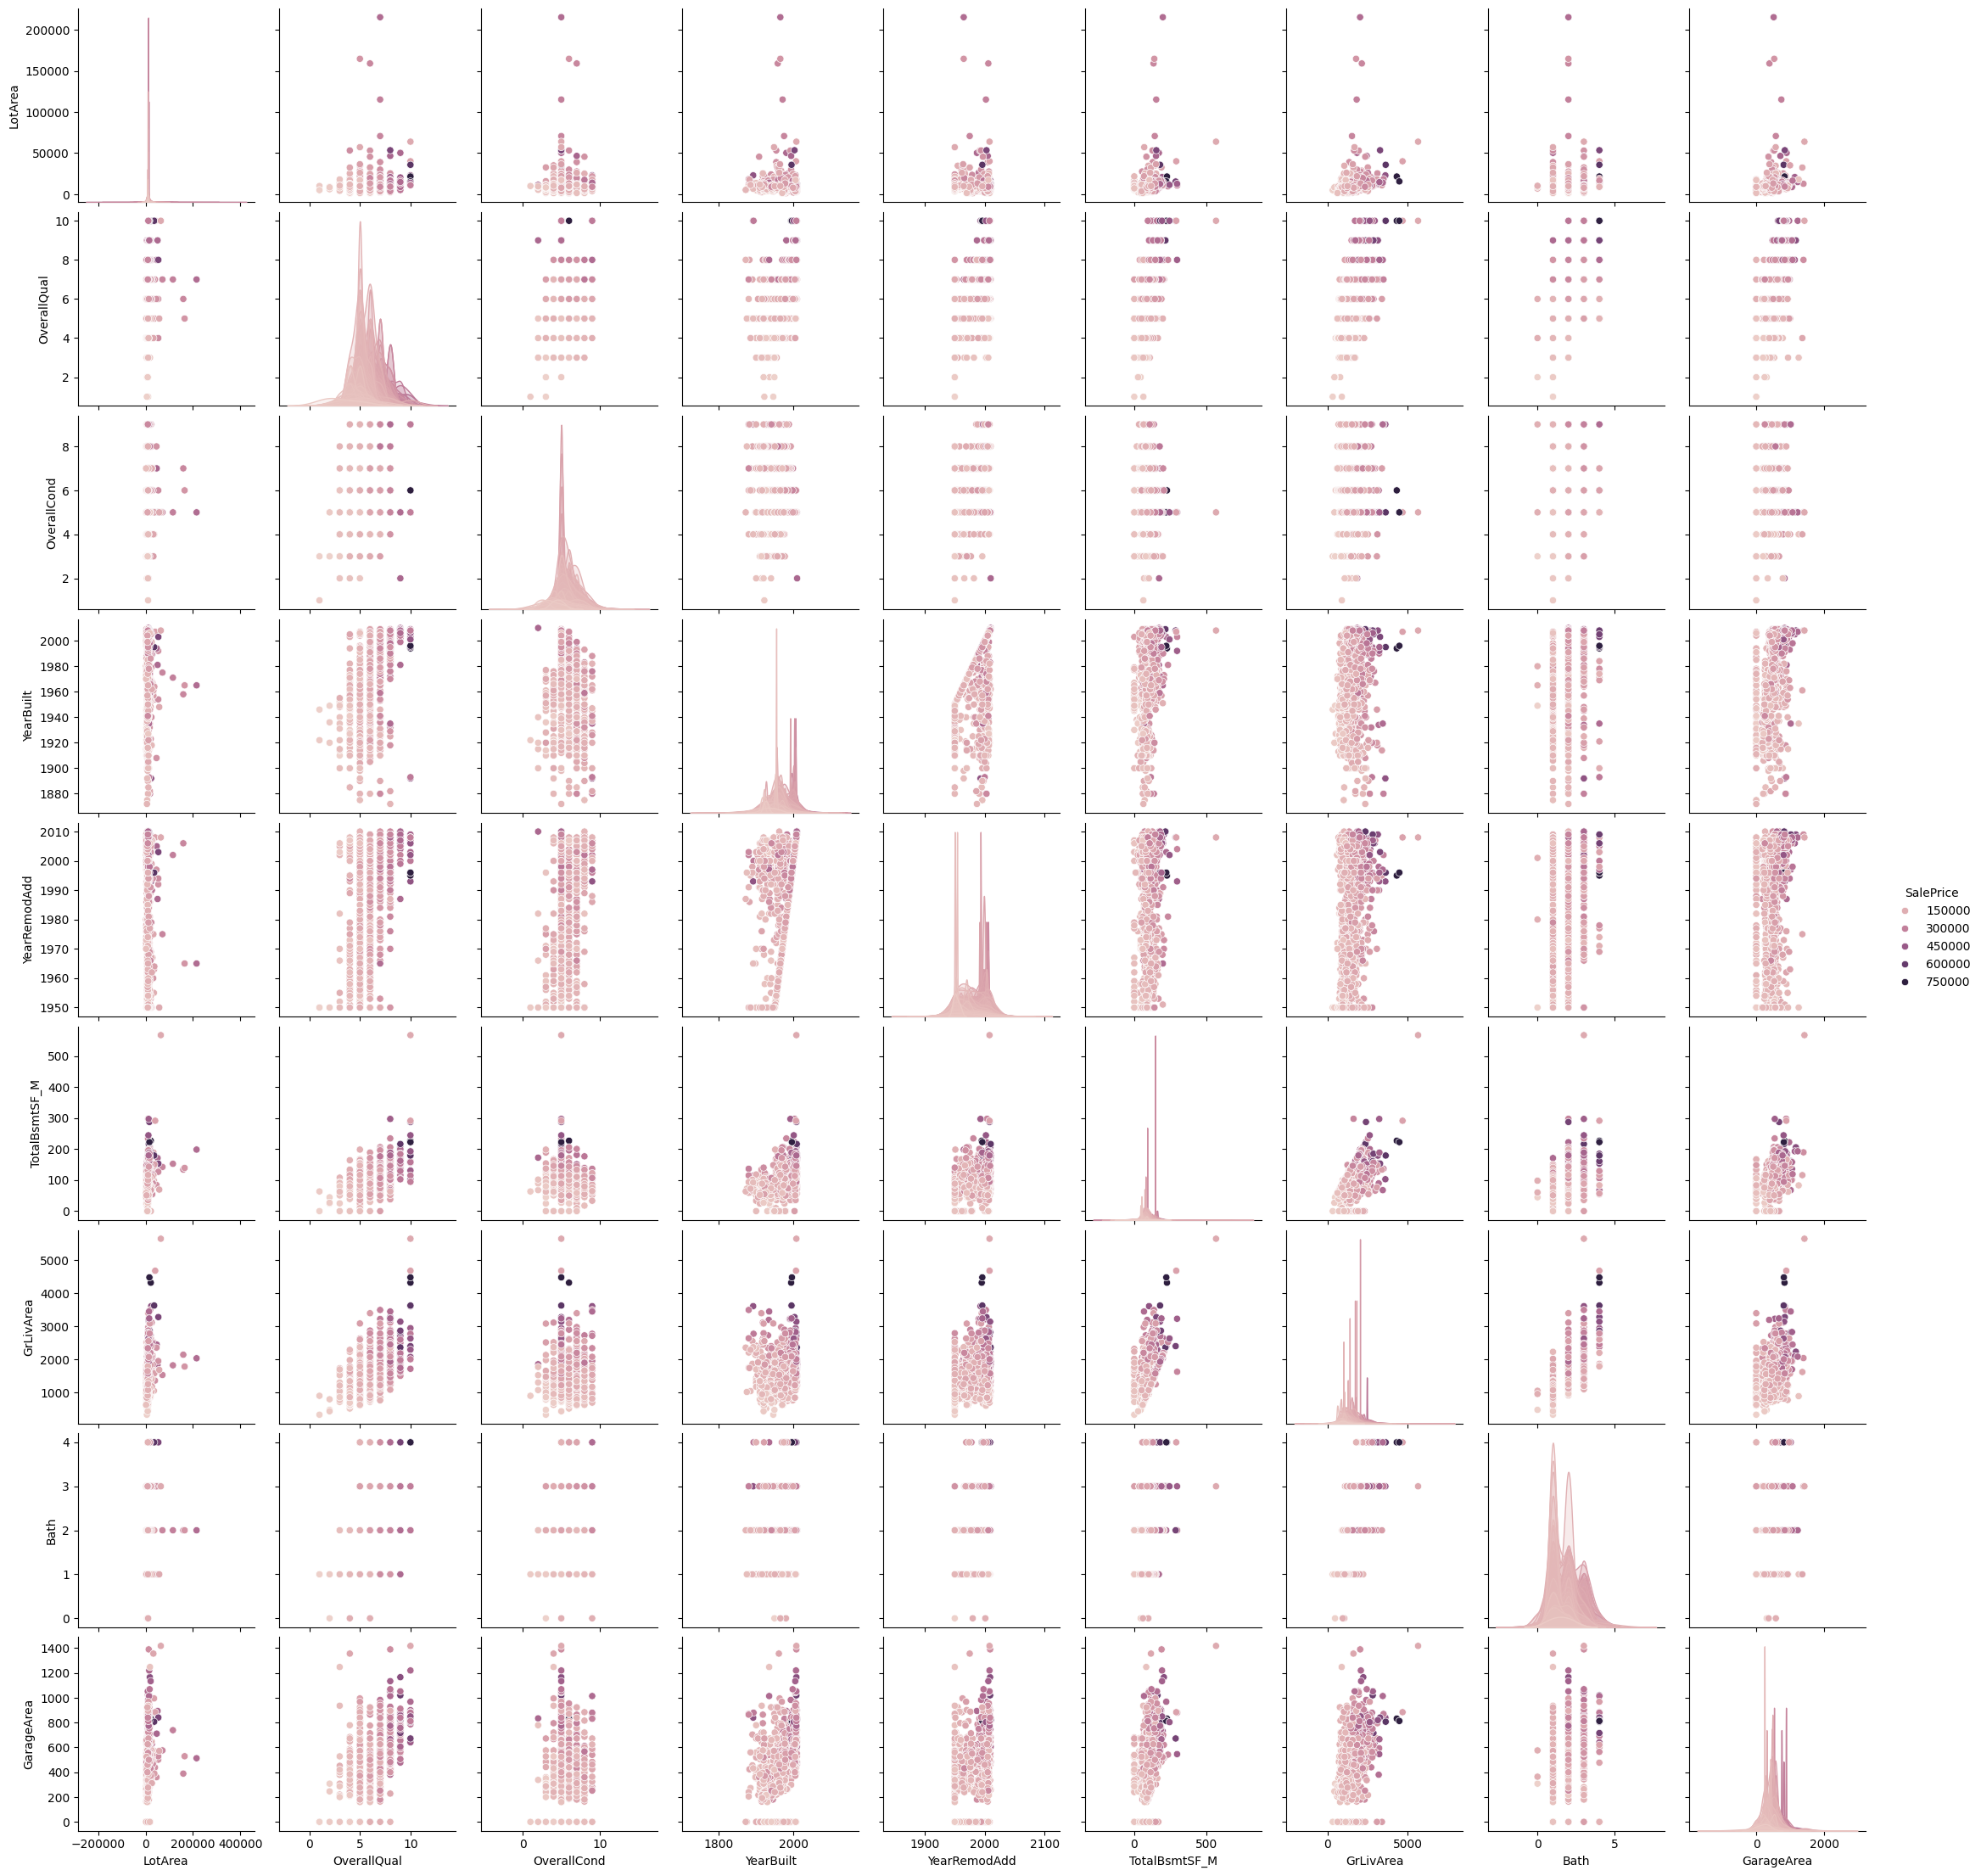

In [134]:
### Ваш код здесь ###
sns.pairplot(df, hue='SalePrice');

4. Сделайте предварительные выводы.

Больше всего на рынке дешевых квартир: без гаража, с 1 ванной комнатой, 3000-3500 кв.футов жилов площади,
с подвалом площадью ~ 100-120 кв.м., здания, построенный в 1940-50ых годах, с небольшим участком.

5. Создайте дополнительные переменные из уже имеющихся, обоснуйте свои решения.

Все не мог придумать, какую еще переменную создать и по какому принципу. Думал взять переменную:
Стоимость: высокая, низкая, средняя. Побоялся , что будет слишком большая корреляция и модель переобучится.
Взял переменную "Сколько здание не подлежало ремонту с года постройки". Корреляция вышла небольшая, так еще и отрицательная.

In [135]:
### Ваш код здесь ###
df['YearsWithoutRemod'] = df.YearRemodAdd - df.YearBuilt
df.YearsWithoutRemod.corr(df.SalePrice)

-0.2175033152200014

## Задание 4 

Подготовьте данные:

1. Разделите данные на тренировочную и тестовую выборки.

In [136]:
### Ваш код здесь ###

train, test = train_test_split(df, train_size = 0.7, random_state = 42)

2. Закодируйте категориальные признаки в тренировочной и тестовой выборках.

In [137]:
### Ваш код здесь ###
train = pd.get_dummies(data=train, dtype=float)
test = pd.get_dummies(data=test, dtype=float)
# Достаем упущенные колонки из тренировочной выборки
missing_cols = set(train.columns) - set(test.columns)
# Добовляем недостающие колонки в тестовый сэт по дефолту == 0
for c in missing_cols:
    test[c] = 0
# Убедимся, что колонки в тренировочном такие же, как и в тестовом
test = test[train.columns]
test.columns==train.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

3. Подготовьте числовые признаки в тренировочной и тестовой выборках к передаче в модель: приведите их к единому масштабу.

In [138]:
### Ваш код здесь ###
np_train = preprocessing.normalize(train, axis=0)
np_test = preprocessing.normalize(test, axis=0)
scaled_train = pd.DataFrame(np_train, columns = train.columns)
scaled_test = pd.DataFrame(np_test, columns = test.columns)
scaled_train = scaled_train.sort_values(by='SalePrice', ascending=False)
scaled_test = scaled_test.sort_values(by='SalePrice', ascending=False)
scaled_train.head()

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF_M,GrLivArea,Bath,GarageArea,SalePrice,...,DateSold_9/2006,DateSold_9/2007,DateSold_9/2008,DateSold_9/2009,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
26,0.031311,0.049843,0.027579,0.031689,0.031471,0.065199,0.086541,0.059365,0.048872,0.118212,...,0.0,0.0,0.0,0.0,0.121268,0.0,0.0,0.0,0.000000,0.000000
392,0.071670,0.049843,0.027579,0.031673,0.031471,0.052518,0.070126,0.059365,0.048511,0.099171,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.034462,0.000000
446,0.027840,0.044859,0.027579,0.031880,0.031676,0.047185,0.054562,0.059365,0.061316,0.092496,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.108465
390,0.030927,0.049843,0.027579,0.031880,0.031660,0.084192,0.046442,0.029683,0.040396,0.088064,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.034462,0.000000
1004,0.107232,0.039875,0.027579,0.031800,0.031582,0.044899,0.063398,0.059365,0.050555,0.085366,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.034462,0.000000


In [139]:
train_X = scaled_train.drop(['SalePrice'], axis = 1)
train_y = scaled_train.SalePrice
test_X = scaled_test.drop(['SalePrice'], axis = 1)
test_y = scaled_test.SalePrice

## Задание 5

Займитесь обучением модели:

1. Обучите модель линейной регрессии без регуляризации. Посмотрите на веса полученной модели. Сделайте предсказания по обучающей и тестовой выборкам.

In [140]:
### Ваш код здесь ###
Linear_reg = LinearRegression()
Linear_reg.fit(train_X, train_y)

LinearRegression()

In [141]:
test_X.shape

(439, 116)

In [142]:
print('w_0:', Linear_reg.intercept_)
print('w_i:', Linear_reg.coef_)

w_0: -276537134491.97144
w_i: [ 4.59517428e-02  4.92388033e-01  1.34925791e-01 -2.58652697e+12
  2.60443006e+12  7.07689062e-02  3.56532270e-01  1.13438340e-02
  8.93467023e-02 -3.72395745e+10 -4.42363522e+10 -7.05358311e+11
  4.57470092e+12  7.67800747e+11  9.40360027e+11  8.43998954e+11
  1.40180596e+12  7.97623931e+10  6.75095078e+11  7.21477992e+10
  3.46008690e+11  4.80985328e+10  3.40107987e+10 -1.04438150e+12
 -5.58245394e+11 -3.25510204e+12 -4.45198514e+12  4.31273148e+11
  1.43037121e+12  3.06477155e+12  3.04956168e+11  9.12323662e+12
  1.37022931e+12  2.82237918e+12  2.87991944e+12  5.72810399e+11
  3.01897588e+11  2.33848866e+11 -2.70684051e+10 -8.54264455e+11
 -1.04835482e+11 -5.41368101e+10 -3.82805055e+10 -4.68838528e+10
  1.81615561e+12  4.84920160e+11  1.03942663e+12  7.97203832e+10
  1.36691983e+12 -1.26000620e+12 -4.47494415e+12  8.65735715e+11
  5.88151601e+11  2.18752338e+12  2.42738747e+12 -1.37960320e+11
 -1.95105355e+11 -1.68966194e+11 -1.95105355e+11 -1.54244327

In [143]:
y_predict_train = Linear_reg.predict(train_X)
y_predict_test =Linear_reg.predict(test_X)

In [144]:
train_mse = mean_squared_error(train_y, y_predict_train)
test_mse = mean_squared_error(test_y, y_predict_test)
train_r2 = r2_score(train_y, y_predict_train)
test_r2 = r2_score(test_y, y_predict_test)

print('MSE train:', train_mse)
print('MSE test:', test_mse)
print(f'R2 train: {train_r2}')
print(f'R2 test: {test_r2}')

MSE train: 3.061853724431159e-05
MSE test: 2.2670123479079915e+22
R2 train: 0.7981358039192434
R2 test: -5.626306521504227e+25


2. Понаблюдайте, как ведёт себя модель с L1-регуляризацией (Lasso). Найдите лучший параметр регуляризации. Сделайте предсказания по обучающей и тестовой выборкам, замерьте качество с помощью MAE, MSE, $R^2$. Для воспроизводимости результатов задайте параметр `random_state=42` при определении модели Lasso.

In [168]:
coef = []
for i in range(-7,1):
    alpha = 10**i
    lasso_regression = Lasso(alpha=alpha)
    lasso_regression.fit(train_X, train_y)

    coef.append(list(lasso_regression.coef_))

    print('-'*5, 'lambda =', alpha, '-'*5)
    print(lasso_regression.score(train_X, train_y))

----- lambda = 1e-07 -----
0.8093986866728771
----- lambda = 1e-06 -----
0.8074988026735503
----- lambda = 1e-05 -----
0.7726132021916902
----- lambda = 0.0001 -----
0.2866228300908915
----- lambda = 0.001 -----
0.0
----- lambda = 0.01 -----
0.0
----- lambda = 0.1 -----
0.0
----- lambda = 1 -----
0.0


In [169]:
### Ваш код здесь ###
lasso_regression = Lasso(alpha=0.000001, random_state=42)
lasso_regression.fit(train_X,train_y)

Lasso(alpha=1e-06, random_state=42)

In [170]:
print('w_0:', lasso_regression.intercept_)
print('w_i:', lasso_regression.coef_) # Весь получился нулевым

w_0: -0.005909918626146319
w_i: [ 4.67860258e-02  4.91314217e-01  7.71197141e-02  0.00000000e+00
  0.00000000e+00  8.25718572e-02  3.00810986e-01  5.34670340e-02
  9.76277170e-02 -1.94766864e-02 -0.00000000e+00  0.00000000e+00
  0.00000000e+00 -7.26074217e-03 -1.87871780e-02 -2.19681373e-02
 -1.65786045e-02  7.49507329e-03 -0.00000000e+00 -0.00000000e+00
  1.73683101e-02  1.72619789e-03  2.49000696e-03  2.27062886e-02
  0.00000000e+00  1.71734194e-02 -2.21315626e-02  1.06432191e-03
 -0.00000000e+00 -1.46794495e-03 -0.00000000e+00  0.00000000e+00
 -1.17852544e-02 -0.00000000e+00  1.82006530e-02 -0.00000000e+00
 -6.00081811e-04 -2.79715981e-03  2.13844786e-03 -0.00000000e+00
  1.01358722e-03  0.00000000e+00 -7.18271738e-03  6.40614324e-03
  1.84818807e-02  4.34978472e-03 -4.32347842e-03 -8.73013284e-04
 -0.00000000e+00 -1.26777232e-02  0.00000000e+00  5.87405122e-02
 -8.96823487e-04  1.82338819e-02 -1.05742917e-02 -2.23796126e-03
 -2.98257745e-03 -1.57045403e-02  9.93781485e-03 -3.657817

In [171]:
y_predict_train = lasso_regression.predict(train_X)
y_predict_test = lasso_regression.predict(test_X)
train_r2 = r2_score(train_y, y_predict_train)
test_r2 = r2_score(test_y, y_predict_test)

print('MSE train:', train_mse)
print('MSE test:', test_mse)
print(f'R2 train: {train_r2}')
print(f'R2 test: {test_r2}')

MSE train: 3.061853724431159e-05
MSE test: 2.2670123479079915e+22
R2 train: 0.8074988026735503
R2 test: 0.7974896745635525


Посмотрите на веса полученной модели. Какой вывод можно сделать?

3. Понаблюдайте, как ведёт себя модель с L2-регуляризацией (Ridge). Найдите лучший параметр регуляризации. Сделайте предсказания по обучающей и тестовой выборкам, замерьте качество с помощью MAE, MSE, $R^2$. Для воспроизводимости результатов задайте параметр `random_state=42` при определении модели Ridge.

In [149]:
### Ваш код здесь ###
ridge_reg = Ridge(alpha=0.01,random_state=42)
ridge_reg.fit(train_X, train_y)

Ridge(alpha=0.01, random_state=42)

In [150]:
print('w_0:', ridge_reg.intercept_)
print('w_i:', ridge_reg.coef_)

w_0: -0.002506275963658277
w_i: [ 4.83563797e-02  3.27175099e-01  1.00986639e-01  1.19235415e-02
  1.15262115e-02  1.04334418e-01  2.70849646e-01  9.18524548e-02
  1.06773211e-01 -2.20558359e-02 -7.45842257e-04  4.67752917e-05
  1.30986558e-02 -5.96621638e-03 -1.97431276e-02 -2.05762935e-02
 -1.38461027e-02  7.90580800e-03 -9.62096012e-03 -2.29536673e-03
  1.67449308e-02  2.87585212e-03  2.87751168e-03  2.68244966e-02
  7.60378699e-04  2.52480381e-02 -2.48483368e-02  2.81444837e-03
  2.57455283e-05 -2.48035642e-03 -4.42598916e-04  7.10940389e-04
 -1.21253418e-02 -9.15459748e-03  1.56776570e-02 -2.72260443e-03
 -1.36493138e-03 -3.10687674e-03  2.21990073e-03 -6.93056568e-04
  2.84469385e-03  1.03570863e-03 -5.12735813e-03  7.97603962e-03
  1.04397528e-02  3.89685270e-03 -1.12350310e-02 -2.56196721e-03
 -6.56047743e-03 -1.40938189e-02  3.96838456e-03  6.14823092e-02
 -7.74316624e-03  8.97609655e-03 -2.81408293e-02 -4.30504746e-03
 -4.66332446e-03 -1.61033120e-02  1.06540547e-02 -4.045464

In [151]:
y_predict_train = ridge_reg.predict(train_X)
y_predict_test = ridge_reg.predict(test_X)
train_r2 = r2_score(train_y, y_predict_train)
test_r2 = r2_score(test_y, y_predict_test)

print('MSE train:', train_mse)
print('MSE test:', test_mse)
print(f'R2 train: {train_r2}')
print(f'R2 test: {test_r2}')

MSE train: 3.061853724431159e-05
MSE test: 2.2670123479079915e+22
R2 train: 0.8044096882433973
R2 test: 0.8197804973766382


In [152]:
ridge_reg.score(train_X,train_y)

0.8044096882433973

In [153]:
ridge_reg.score(test_X,test_y)

0.8197804973766382

In [154]:
coef = []
for i in range(-7, -1):
    alpha = 10 ** i
    ridge_reg = Ridge(alpha=alpha)
    ridge_reg.fit(train_X, train_y)

    coef.extend(list(ridge_reg.coef_))

    print('-'*5, 'lambda =', alpha, '-'*5)
    print(ridge_reg.score(train_X,train_y))


----- lambda = 1e-07 -----
0.811669758112654
----- lambda = 1e-06 -----
0.8116688615122603
----- lambda = 1e-05 -----
0.8116023605106102
----- lambda = 0.0001 -----
0.8104731961307364
----- lambda = 0.001 -----
0.8089736171007123
----- lambda = 0.01 -----
0.8044096882433973


In [155]:
coef = []
for i in range(-7, -1):
    alpha = 10 ** i
    ridge_reg = Ridge(alpha=alpha)
    ridge_reg.fit(train_X, train_y)

    coef.extend(list(ridge_reg.coef_))

    print('-'*5, 'lambda =', alpha, '-'*5)
    print(ridge_reg.score(test_X,test_y))


----- lambda = 1e-07 -----
-11.45144848087175
----- lambda = 1e-06 -----
-11.090673497200163
----- lambda = 1e-05 -----
-8.244611044350576
----- lambda = 0.0001 -----
-1.1610452313761863
----- lambda = 0.001 -----
0.6755417276139359
----- lambda = 0.01 -----
0.8197804973766382


Посмотрите на веса полученной модели. Какой вывод можно сделать?

## Задание 6

Ответьте на следующие вопросы:

1. В последней обученной модели выберите три признака с наибольшими положительными коэффициентами. Можно ли утверждать, что чем больше значения этих признаков, тем больше сумма сделки?

2. В последней обученной модели выберите три признака с наибольшими отрицательными коэффициентами. Можно ли утверждать, что чем больше значения этих признаков, тем меньше сумма сделки?

3. В модели Lasso выберите три признака с нулевыми коэффициентами. Как вы думаете, почему модель их исключила? Можно ли смело утверждать, что сумма сделки от этих признаков не зависит?

## Заключение

В этом модуле с помощью регуляризации вы научились обучать модели линейной регрессии с регуляризацией, подбирать коэффициент регуляризации alpha, а также отбирать признаки с помощью L1-регуляризации. 